<a href="https://colab.research.google.com/github/KauaHenSilva/python_background_subtraction/blob/main/temporal_median_filtering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

## Pacotes externos

In [ ]:
import os

In [ ]:
if os.path.exists('python_download_file_drive'):
  !cd python_download_file_drive && git pull
else:
  !git clone https://github.com/KauaHenSilva/python_download_file_drive

Cloning into 'python_download_file_drive'...
remote: Enumerating objects: 14, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 14 (delta 3), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (14/14), 6.51 KiB | 6.51 MiB/s, done.
Resolving deltas: 100% (3/3), done.


In [ ]:
%pip install --upgrade --quiet -r python_download_file_drive/requirements.txt

## baixando arquivos requeridos

In [ ]:
%%capture
!python "python_download_file_drive/main.py" "https://drive.google.com/drive/folders/13LvSXf8YsCxARsMxiRX8RZBRUGzW7RaY?usp=drive_link" arq --folder

## Função de exibição de video

In [ ]:
%pip install --upgrade --quiet ffmpeg-python
import ffmpeg
import base64
import io
from IPython.display import HTML
import tempfile

In [ ]:
def compress_video(input_file, output_file, resolution=(640, 360), bitrate="500k", tempo_max=None):
  if tempo_max:
    input = ffmpeg.input(input_file, t=tempo_max)
  else:
    input = ffmpeg.input(input_file)
  input.output(output_file, vf=f'scale={resolution[0]}:{resolution[1]}', video_bitrate=bitrate).run(overwrite_output=True,  quiet=True)

def show_video(name_file, otimized=False, tempo_max=None):
    if otimized:
      with tempfile.NamedTemporaryFile(suffix=".mp4", delete=False) as temp_video:
          compressed_file = temp_video.name
          compress_video(name_file, compressed_file, tempo_max=tempo_max)
      name_file = compressed_file

    video = io.open(name_file, 'r+b').read()
    encoded = base64.b64encode(video).decode('ascii')



    return HTML(data=f'''
    <video width="640" height="360" controls>
        <source src="data:video/mp4;base64,{encoded}" type="video/mp4">
    </video>''')

# Mediana temporal

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

## Adquirindo e setando paths

In [ ]:
path_video = "/content/arq/Curso_Subtraction/videos/Cars.mp4" #@param {type:"string"}

In [ ]:
vidio = cv2.VideoCapture(path_video)
ok, frame = vidio.read()
if not ok:
  raise Exception("Não foi possivei ler o arquivo!")

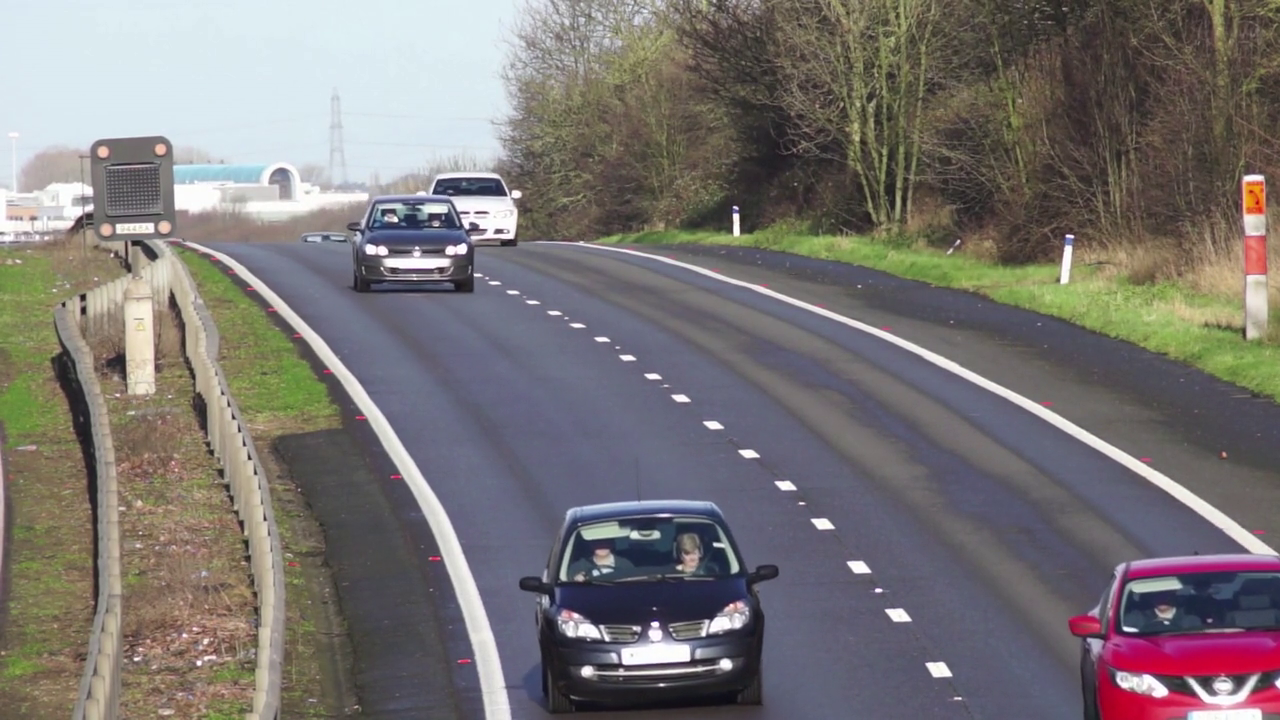

In [ ]:
frames_ids = vidio.get(cv2.CAP_PROP_FRAME_COUNT) * np.random.uniform(size=40)
vidio.set(cv2.CAP_PROP_POS_FRAMES, frames_ids[0])
ok, frame = vidio.read()
if not ok:
  raise Exception("Não foi possivei ler o arquivo!")
cv2_imshow(frame)

In [ ]:
frames = []
for fid in frames_ids:
  vidio.set(cv2.CAP_PROP_POS_FRAMES, fid)
  ok, frame = vidio.read()
  if not ok:
    raise Exception("Não foi possivei ler o arquivo!")
  frames.append(frame)
np.asarray(frames).shape

(40, 720, 1280, 3)

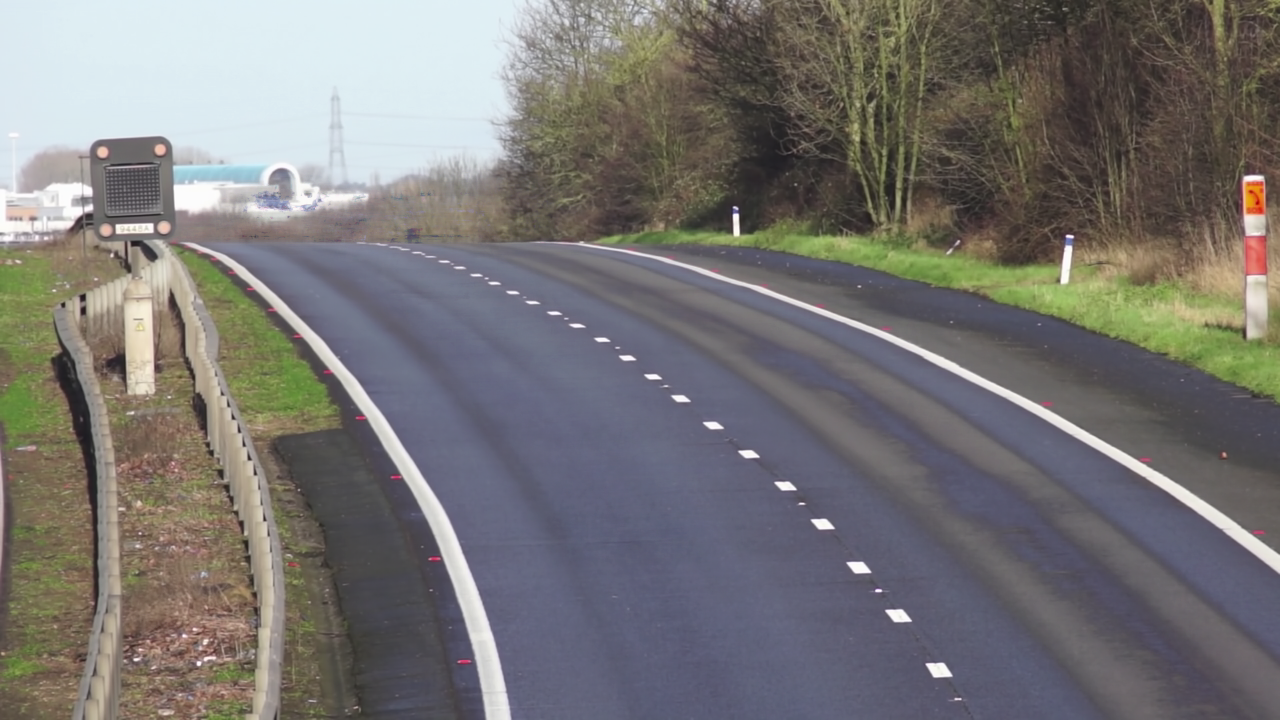

In [ ]:
median_frame = np.median(frames, axis=0).astype(dtype=np.uint8)
cv2_imshow(median_frame)

In [ ]:
vidio = cv2.VideoCapture(path_video)
ok, frame = vidio.read()
if not ok:
  raise Exception("Não foi possivei ler o arquivo!")
forcc = cv2.VideoWriter_fourcc(*'MP4V')
out = cv2.VideoWriter("out.mp4", forcc, 24, (frame.shape[1], frame.shape[0]))
grey_median_frame = cv2.cvtColor(median_frame, cv2.COLOR_BGR2GRAY)

In [ ]:
while True:
  ok, frame = vidio.read()
  if not ok:
    break
  grey_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
  dframe = cv2.absdiff(grey_median_frame, grey_frame)
  th, dframe = cv2.threshold(dframe, 30, 255, cv2.THRESH_BINARY)
  dframe = cv2.cvtColor(dframe, cv2.COLOR_GRAY2BGR)
  out.write(dframe)

out.release()
vidio.release()

> Nota: Para visualizar o resultado use o COLAB ou o VSCODE


In [ ]:
show_video("out.mp4", otimized=True, tempo_max=10)